# <font color="Yellow"><b>ST590 Project 1</b></font>
## <font color="Green">Sergio Mora & Vivi Feathers</font>

# <font color="red"><b>Introduction</b></font>
<font color="green">Purples:</font> Predict a value of <i>selling_price</i> for a new motorcycle.

<font color="green">Dataset name:</font> <b>BikeDetails</b> <br>
This dataset contains information about used motorcycles, including their features and selling prices.

<font color="green">Variables used:</font> <i>selling_price</i>, <i>km_driven</i>
<style>
        .tab1 {
            tab-size: 2;
        }
    </style>
<font color="green">Methods:</font><br>
<pre class="tab1">1. Grid search</pre>
<pre class="tab1">2. Gradient descent</pre>
        
<font color="green">Algorithms:</font><br>
<pre class="tab1">1. Using only <i>selling_price</i> to predict c</pre>
<pre class="tab1">2. Using simple linear regression with <i>selling_price</i> and <i>km_driven</i> to predict c</pre>
 
<font color="green">Modules:</font><br>
<pre class="tab1">1. pandas</pre>
<pre class="tab1">2. numpy</pre>
<pre class="tab1">3. matplotlib.pyplot</pre>
<pre class="tab1">4. scipy.stats</pre>

 ## <font color="red">Read in dataset and display the first several rows</font>

In [1]:
### Import modules
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import scipy.stats as stat
from sklearn.linear_model import LinearRegression
import random as rd
from scipy.spatial import distance

In [2]:
### Reading the data
bikeDetails = pd.read_csv("bikeDetails.csv")

In [4]:
### Data structure and first several rows
a=bikeDetails.shape
print(a)
bikeDetails.head()

(1061, 7)


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


# <font color="red"><b>EDA</b></font>
## <font color="Green"><i>selling_price</i></font>

In [5]:
### General information
bikeDetails["selling_price"].describe(percentiles=[0.25, 0.75])

count      1061.000000
mean      59638.151744
std       56304.291973
min        5000.000000
25%       28000.000000
50%       45000.000000
75%       70000.000000
max      760000.000000
Name: selling_price, dtype: float64

In [6]:
# Check normality #
import scipy.stats as stat
stat, p = stat.shapiro(bikeDetails["selling_price"])
print(p)
# not normally distributed, use median and IQR #
median_price = bikeDetails["selling_price"].median()
q1_price = bikeDetails["selling_price"].quantile(q = [0.25])
q3_price = bikeDetails["selling_price"].quantile(q = [0.75])
IQR_price = q3_price[0.75] - q1_price[0.25]
print("The meidian of selling_price is", median_price)
print("The first quartile of selling_price is", q1_price)
print("The third quartile of selling_price is", q3_price)
print("The IQR of selling_price is", IQR_price)

2.972154042832937e-42
The meidian of selling_price is 45000.0
The first quartile of selling_price is 0.25    28000.0
Name: selling_price, dtype: float64
The third quartile of selling_price is 0.75    70000.0
Name: selling_price, dtype: float64
The IQR of selling_price is 42000.0


In [7]:
### Median, Q1 and Q3 of selling_price in different seller_type groups
bikeDetails.seller_type = bikeDetails.seller_type.astype("category")
bike_sub = bikeDetails.loc[:,["seller_type","selling_price"]]
price_group_median=bike_sub.groupby("seller_type").median()
print(price_group_median)
price_group_q1=bike_sub.groupby("seller_type").quantile(q = [0.25])
print(price_group_q1)
price_group_q3=bike_sub.groupby("seller_type").quantile(q = [0.25])
print(price_group_q3)

             selling_price
seller_type               
Dealer             44000.0
Individual         45000.0
                  selling_price
seller_type                    
Dealer      0.25        28250.0
Individual  0.25        28000.0
                  selling_price
seller_type                    
Dealer      0.25        28250.0
Individual  0.25        28000.0


## <font color="Green"><i>km_driven</i></font>

In [8]:
### General information
bikeDetails["km_driven"].describe(percentiles=[0.25, 0.75])

count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

In [9]:
# Check normality #
import scipy.stats as stat
stat, p = stat.shapiro(bikeDetails["km_driven"])
print(p)
# not normally distributed, use median and IQR #
median_km = bikeDetails["km_driven"].median()
q1_km = bikeDetails["km_driven"].quantile(q = [0.25])
q3_km = bikeDetails["km_driven"].quantile(q = [0.75])
IQR_km = q3_km[0.75] - q1_km[0.25]
print("The meidian of km_driven is", median_km)
print("The first quartile of km_driven is", q1_km)
print("The third quartile of km_driven is", q3_km)
print("The IQR of km_driven is", IQR_km)

0.0
The meidian of km_driven is 25000.0
The first quartile of km_driven is 0.25    13500.0
Name: km_driven, dtype: float64
The third quartile of km_driven is 0.75    43000.0
Name: km_driven, dtype: float64
The IQR of km_driven is 29500.0


## <font color="red">Correlation between</font> <font color="Green"><i>selling_price</i></font> <font color="red">and</font> <font color="Green"><i>km_driven</i></font>

In [10]:
### Correlation Matrix
bikeDetails[["selling_price", "km_driven"]].corr()

,selling_price,km_driven
selling_price,1.000000,-0.212937
km_driven,-0.212937,1.000000


In [8]:
### Pearson correlation
stat. pearsonr(bikeDetails.selling_price, bikeDetails.km_driven)
### the P value is smaller than 0.05, and the correlation coefficient is -0.2129, significate negative correlation.

(-0.2129367071445366, 2.411679611918878e-12)

## <font color="red">Linear Regression Model of</font> <font color="Green"><i>selling_price</i></font> <font color="red">and</font> <font color="Green"><i>km_driven</i></font>

In [23]:
x=bikeDetails.km_driven.values.reshape(-1, 1)
y=bikeDetails.selling_price.values.reshape(-1, 1)
#print(x)
#print(y)
model = LinearRegression().fit(x, y)
print("b0 = ", model.intercept_, "\nb1 = ", model.coef_)

b0 =  [67618.07212024] 
b1 =  [[-0.23224561]]


## <font color="red">Subset the data for 100 times and get 100 Linear Regression Models of</font> <font color="Green"><i>selling_price</i></font> <font color="red">and</font> <font color="Green"><i>km_driven</i></font><font color="red">, return b0 and b1 lists</font>

In [37]:
b0 = []
b1 = []
for i in range (0, 100):
    x = bikeDetails.km_driven.sample(n=100).values.reshape(-1, 1)
    y = bikeDetails.selling_price.sample(n=100).values.reshape(-1, 1)
    #print(x)
    #print(y)
    model = LinearRegression().fit(x, y)
    b0_now = model.intercept_.tolist()
    b1_now = model.coef_.tolist()
    b0.append(b0_now)
    b1.append(b1_now)
print(b0)
print(b1)

[[60227.77608004785], [63936.354798327615], [49709.15951940609], [64275.674685908794], [61384.48487808885], [47129.16422413275], [69541.83446787132], [65589.1543569351], [67004.57424958059], [50783.96299612287], [57980.06593849559], [59183.44333516728], [66027.96838847312], [63183.25715078059], [56227.501024847246], [60877.30180109996], [54902.73958026637], [67368.08395073665], [63874.03212806322], [57525.693527869014], [56363.33774566687], [55809.910372966886], [52136.48907197542], [58216.64081237051], [56545.20802633304], [62996.781375902574], [55970.9983337863], [60731.725536016354], [73481.7127016719], [59500.592198139166], [65470.96438872952], [63496.157618913945], [76543.33934399905], [68540.07024296664], [70826.94963032992], [67826.85323739554], [53207.390199690846], [74705.81803695155], [57898.837303714536], [56599.80442131395], [55787.201866045645], [66122.05495417867], [58009.3483743592], [55493.38917632207], [62376.97710908326], [58536.85865963971], [53996.113616364324], [52

## <font color="red">Plots of</font> <font color="Green"><i>selling_price</i></font> <font color="red">and</font> <font color="Green"><i>km_driven</i></font>

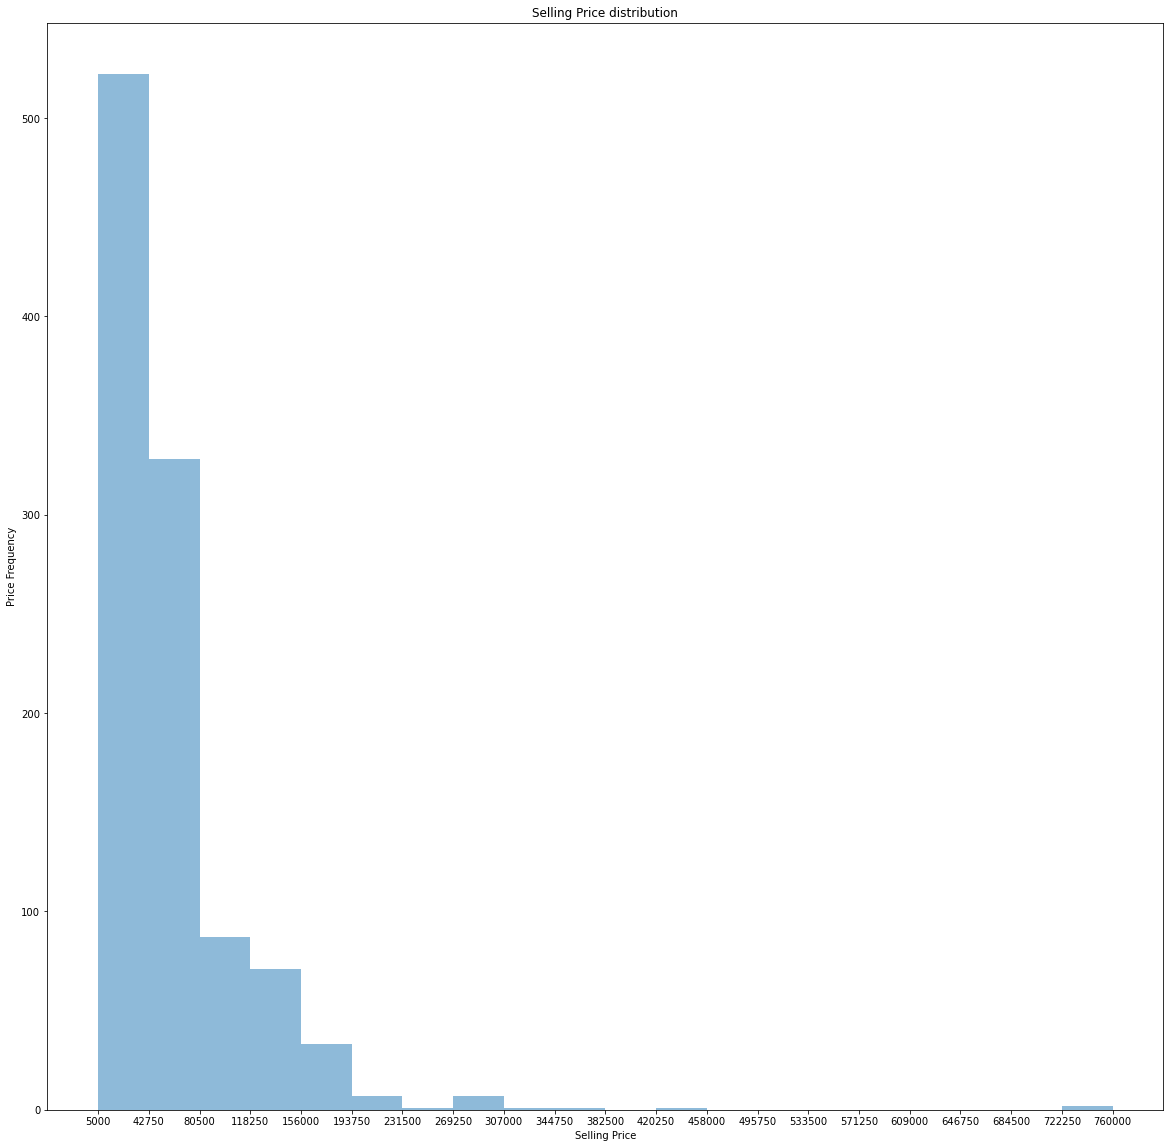

In [12]:
### Histogram for selling_price
fig, ax = plt.subplots(figsize=(20,20))
n, bins, patches=plt.hist(bikeDetails["selling_price"], bins=20, alpha = 0.5)
plt.ylabel("Price Frequency")
plt.xlabel("Selling Price")
plt.xticks(bins)
plt.title("Selling Price distribution")
plt.show()
plt.close()

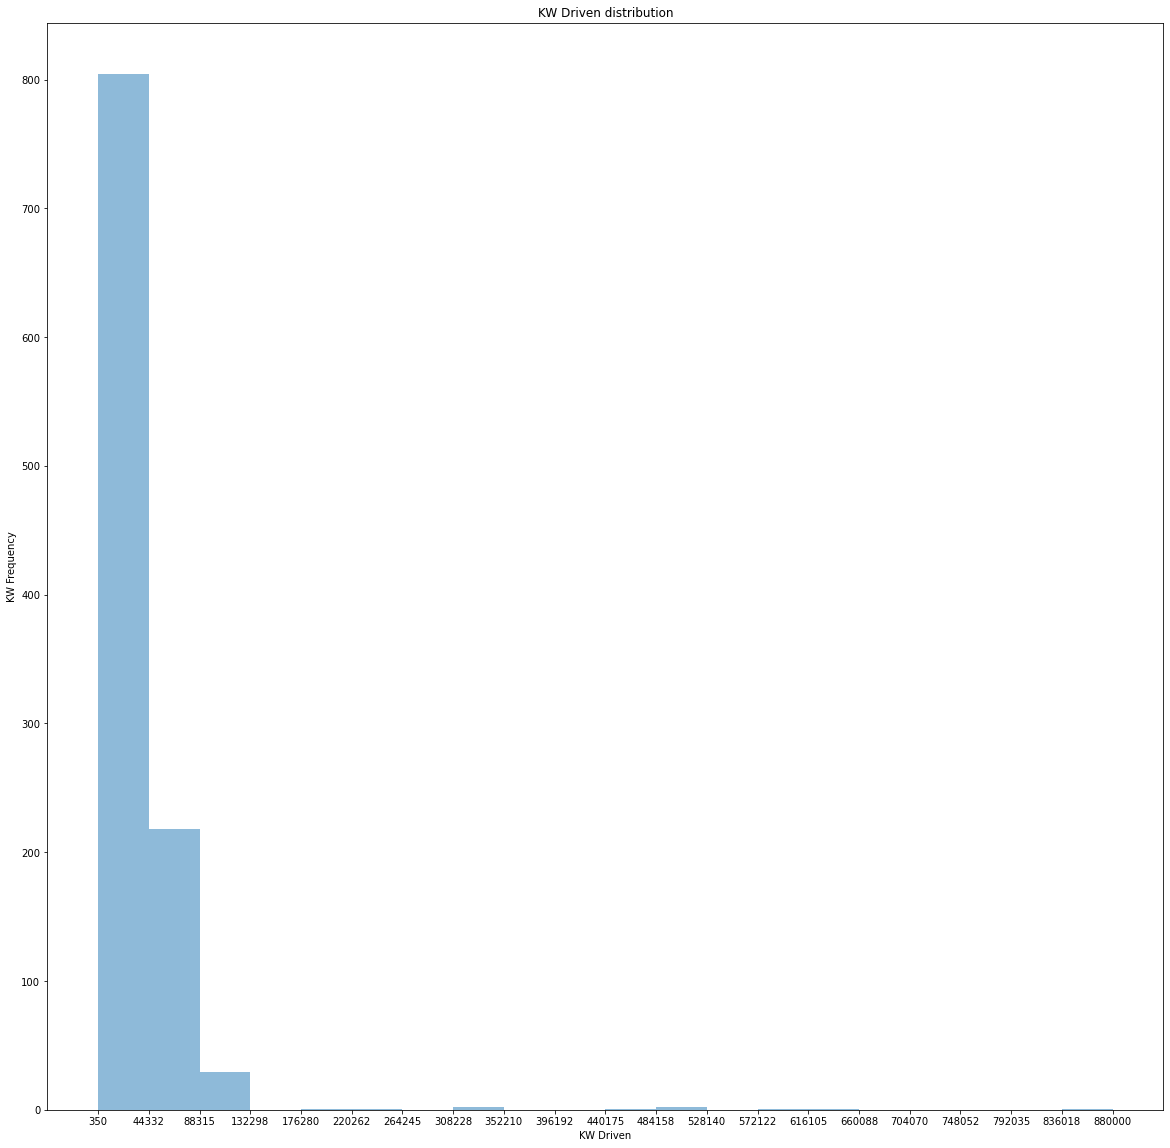

In [13]:
### Histogram for kw_driven
fig, ax = plt.subplots(figsize=(20,20))
n, bins, patches=plt.hist(bikeDetails["km_driven"], bins=20, alpha = 0.5)
plt.ylabel("KW Frequency")
plt.xlabel("KW Driven")
plt.xticks(bins)
plt.title("KW Driven distribution")
plt.show()
plt.close()

{'whiskers': [<matplotlib.lines.Line2D at 0x26d9ca66dd0>,
 'caps': [<matplotlib.lines.Line2D at 0x26da0dbb8b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26da0dabdf0>],
 'medians': [<matplotlib.lines.Line2D at 0x26da0db92a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26da0db99c0>],
 'means': []}

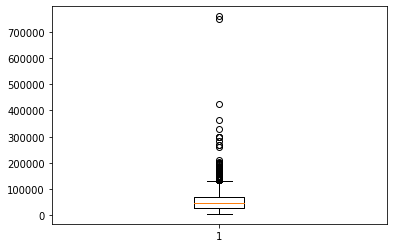

In [42]:
### boxplot of selling_price
plt.boxplot(bikeDetails.selling_price)

{'whiskers': [<matplotlib.lines.Line2D at 0x24e5b0d7610>,
 'caps': [<matplotlib.lines.Line2D at 0x24e5b0d7b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x24e5b0d76a0>],
 'medians': [<matplotlib.lines.Line2D at 0x24e5b0c9490>],
 'fliers': [<matplotlib.lines.Line2D at 0x24e5b0c9640>],
 'means': []}

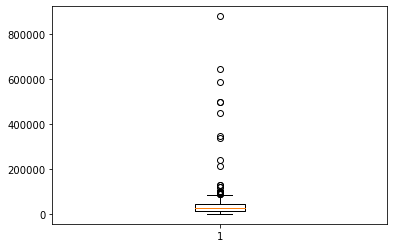

In [14]:
### boxplot of km_driven
plt.boxplot(bikeDetails.km_driven)

We see a lot of outliers in our `Km_driven` variable meaning that it will likely be a sub-par variable in our predictive function.

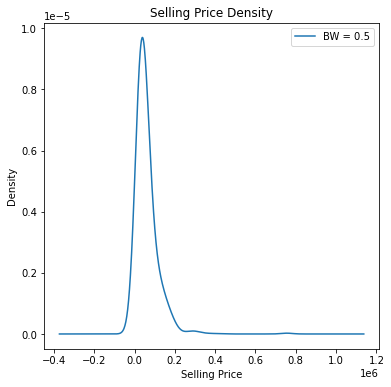

In [15]:
# Kernel density for selling_price #
fig, ax = plt.subplots(figsize=(6,6))
bikeDetails["selling_price"].plot.density(bw_method = 0.5, label = "BW = 0.5", ax=ax)
plt.ylabel("Density")
plt.xlabel("Selling Price")
plt.title("Selling Price Density")
plt.legend()
plt.show()
plt.close()

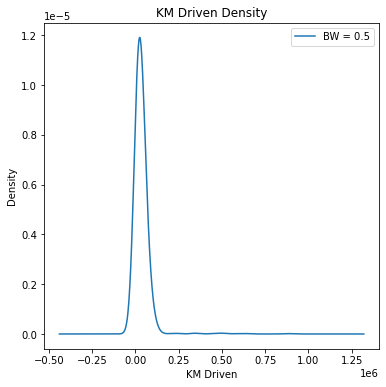

In [16]:
# Kernel density for kw_driven #
fig, ax = plt.subplots(figsize=(6,6))
bikeDetails["km_driven"].plot.density(bw_method = 0.5, label = "BW = 0.5", ax=ax)
plt.ylabel("Density")
plt.xlabel("KM Driven")
plt.title("KM Driven Density")
plt.legend()
plt.show()
plt.close()

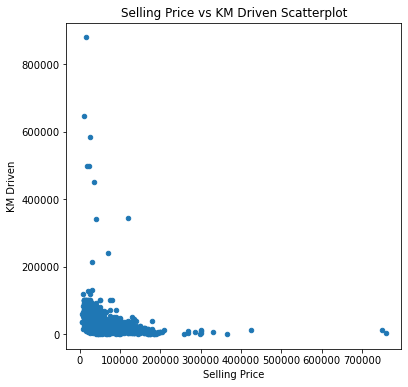

In [17]:
# Selling_price vs KM_Driven Scatterplot #
fig, ax = plt.subplots(figsize=(6,6))
bikeDetails.plot.scatter (x= "selling_price", y="km_driven", cmap = "plasma", ax=ax)
plt.xlabel("Selling Price")
plt.ylabel("KM Driven")
plt.title("Selling Price vs KM Driven Scatterplot")
plt.show()
plt.close()

## <font color="red">Contingency Table and Bar Chart of</font> <font color="Green"><i>year</i></font> <font color="red">and</font> <font color="Green"><i>owner</i></font>

In [18]:
### Contingency table
bikeDetails.owner = bikeDetails.owner.astype("category")
bikeDetails.year = bikeDetails.year.astype("category")
bikeDetails.year [0:4]
table = pd.crosstab(bikeDetails.year, bikeDetails.owner)
print(table)

owner  1st owner  2nd owner  3rd owner  4th owner
year                                             
1988           1          0          0          0
1991           1          0          0          0
1993           0          1          0          0
1995           0          0          1          0
1997           2          0          0          0
1998           2          0          1          0
1999           0          1          0          0
2000           4          0          1          1
2001           1          1          0          0
2002           1          2          0          0
2003           1          0          0          0
2004           4          1          0          0
2005          11          3          0          0
2006          17          3          0          0
2007          24          5          0          0
2008          21          5          2          0
2009          21          5          1          1
2010          50         10          0          0


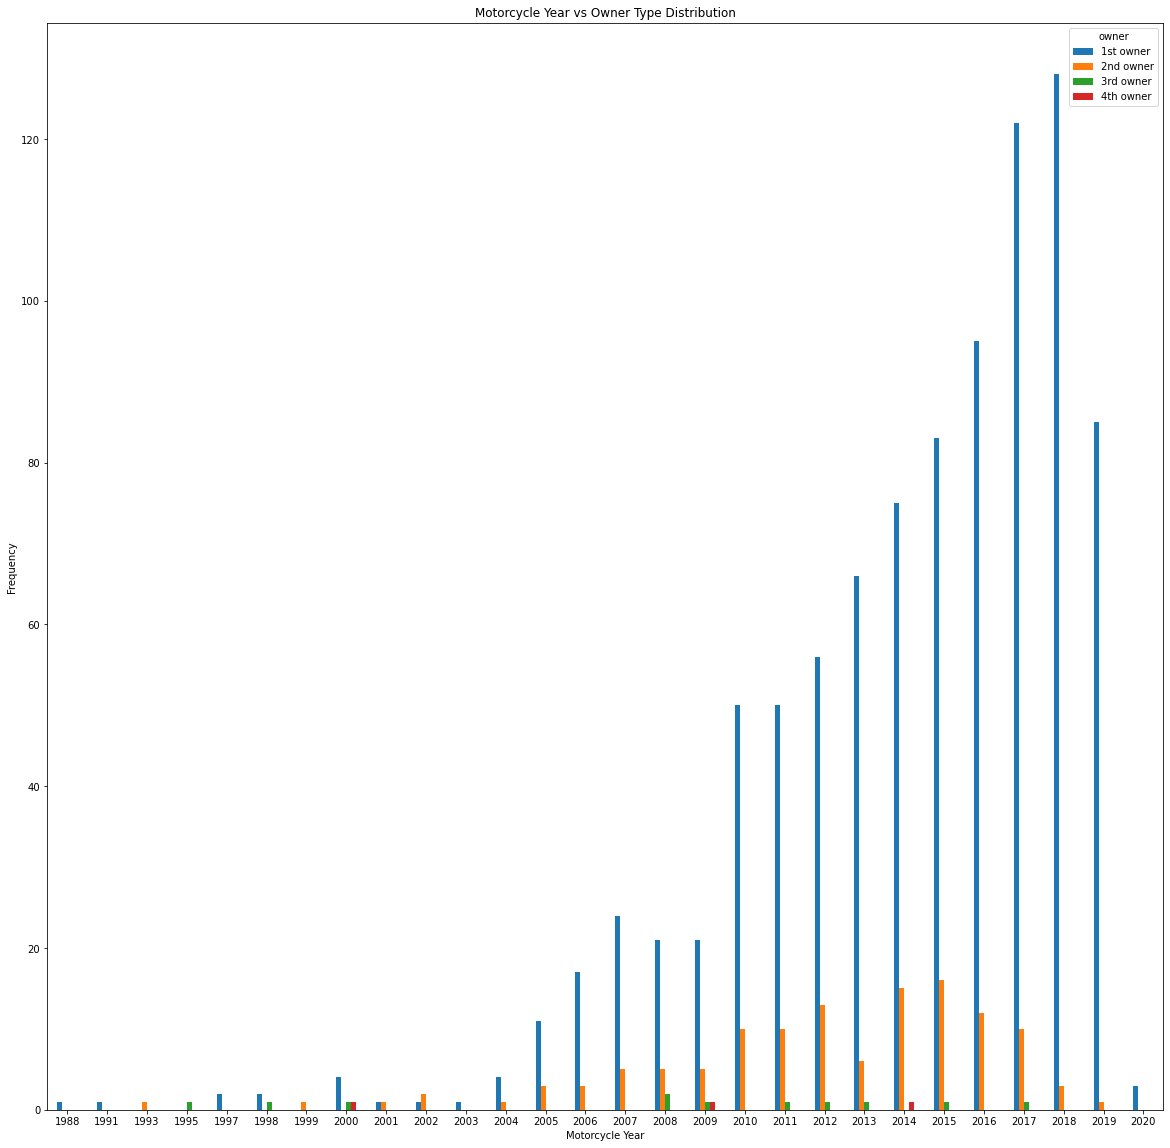

In [19]:
### Bar chart
fig, ax = plt.subplots(figsize=(20,20))
table.plot.bar(ax=ax)
plt.xlabel("Motorcycle Year")
plt.ylabel("Frequency")
plt.title("Motorcycle Year vs Owner Type Distribution")
plt.xticks(rotation = 0)
plt.show()
plt.close()

# Loss Function

  We start of our analysis with a Loss Function which will help us understand the quality of our methods below. This is done by measuring the Root Mean Square Error (RMSE) which indicates how "off" we were in our model. 
  
  RMSE = $\sqrt{\frac{1}{n}\sum_{i=1}^n{L(y_i,c)}} = \sqrt{\frac{1}{n}\sum_{i=1}^n{(y_i - c)^2}}$
  
For this equation to work we want to find the value for c that minimizes the RMSE meaning we have the least amount of "Loss" in our equation.

# <font color="Red"><b>Methods One A</b></font>
## <font color="Green">Grid Search of using just the y′s</font>

In [47]:
### Find a grid of values using selling_price' mean and standard deviation
np.random.seed(123)
grid_c = np.random.normal(59638.151744, 56304.291973, 10000)

In [48]:
### convert grid array to series
grid_c1 = pd.Series(grid_c)
len(grid_c1)

10000

In [49]:
### Create a RMSE Algorithm
def find_best_c(y, x):
    """
    Calculate RMSE from all the c and append them into a list, find the minimal RMSE and return the corresponding c value
    """
    c_rmse = []
    for i in range(0, len(x)):
        rmse = np.sqrt(sum((y - x[i])**2)/len(y))
        c_rmse.append(rmse)
    min_rmse = min(c_rmse)
    min_loc = c_rmse.index(min_rmse)
    optimal_c = x[min_loc]
    return print("The Min RMSE is =", min_rmse,"\nThe min loc is =", min_loc,"\nThe optimal value for c is = ", optimal_c)

We will utilize a grid of selling prices to predict the `selling_price`. We do this by creating a grid of variables that are centered around the distribution of `Selling_price` as seen in the EDA part of our code.  

In [50]:
find_best_c(bikeDetails.selling_price,grid_c1)

The Min RMSE is = 56277.752282119494 
The min loc is = 799 
The optimal value for c is =  59633.89927166418


In [51]:
### Verification, change the float in rmse_test equation to the third number returned by "find_best_c" funtion
price_mean = bikeDetails.selling_price.mean()
rmse_test = np.sqrt(sum((bikeDetails.selling_price -59633.89927166418)**2)/len(bikeDetails.selling_price))
print("The price mean is = ", price_mean,"\nWhile the rmse_test gives us a value of =", rmse_test)
print("The difference seems to be ",(price_mean - 59633.89927166418))

The price mean is =  59638.151743638075 
While the rmse_test gives us a value of = 56277.752282119494
The difference seems to be  4.252471973893989


We see that our model works best when the `selling_price` is around 59K. This makes perfect sense since our `selling_price` variable is centered there. Our lowest RMSE is around 56K meaning we don't have a great model as the standard deviation of our model seems to be fairly large.

## <font color="Green">Run the function using km_driven</font>

In [52]:
### Find a grid of values using km_driven' mean and standard deviation
np.random.seed(123)
grid_ck = np.random.normal(34359.833176, 51623.152702, 10000)

In [53]:
### convert grid array to series
grid_ck1 = pd.Series(grid_ck)
len(grid_ck1)

10000

In [54]:
find_best_c(bikeDetails.km_driven, grid_ck1)

The Min RMSE is = 51598.81952079937 
The min loc is = 799 
The optimal value for c is =  34355.934254247135


# <font color="Red"><b>Methods One B</b></font>
## <font color="Green">Grid Search of using linear regression model</font>

In [82]:
### Create a RMSE Algorithm accounting for KM_driven 
### Return the b0 b1 pairs that has the minimal RMSE

def find_best_c_with_var(y, x, coeff1, coeff2):
    """
    Calculate RMSE from all the linear regression model and append them into a list, 
    find the minimal RMSE and return the corresponding b0 and b1.
    """
    c_rmse = []
    
    for k in range(0, len(coeff1)):
                y_hat = coeff1[k][0] + coeff2[k][0][0]*x
                rmse = np.sqrt(sum((y - y_hat)**2)/len(y))
                c_rmse.append(rmse)
                
    min_rmse = min(c_rmse)
    min_loc = c_rmse.index(min_rmse)
    optimal_b0 = coeff1[min_loc][0]
    optimal_b1 = coeff2[min_loc][0][0]
    
    
### Use best combination of b0 and b1 to predict the selling_price for km_driven of 10000, 25000, 35000 ###


    selling1 = optimal_b0 + optimal_b1*10000
    selling2 = optimal_b0 + optimal_b1*25000
    selling3 = optimal_b0 + optimal_b1*35000
    return print("The Min RMSE is =", min_rmse,"\nThe optimal b0 is", 
                 optimal_b0, "\nThe optimal b1 is", optimal_b1,\
                "\nThe predicted selling price with km_driven = 10000 is", selling1,\
                "\nThe predicted selling price with km_driven = 25000 is", selling2,\
                "\nThe predicted selling price with km_driven = 35000 is", selling3)

We generated 100 pairs of b0 and b1 in EDA by randomly creating 100 subsets with 100 sample size from the bikeDetail data frame and building 100 regression models.

In [83]:
find_best_c_with_var (bikeDetails.selling_price, bikeDetails.km_driven, b0, b1)

The Min RMSE is = 54990.03038193449 
The optimal b0 is 67901.49219430382 
The optimal b1 is -0.22641230898005732 
The predicted selling price with km_driven = 10000 is 65637.36910450325 
The predicted selling price with km_driven = 25000 is 62241.184469802385 
The predicted selling price with km_driven = 35000 is 59977.06138000182


We see that our model works best when b0 = 67901 and b1 = -0.2264 with the RMSE around 55K. It is lower than the EMSE from using only selling_price to generate grid of c, the linear regression model predicts c better.

# <font color="Red"><b>Methods Two A</b></font>
## <font color="Green">Gradient Descent of using just the y′s</font>

In [102]:
### Creat a Gradient Descent Algorithm
def find_best_c_g(var, step_size, starting_point, rounds):
    """
    Pick initial c and initial delta, create new c value based on the slop and step size, 
    loop through untill either the absolute difference between new c and cur c are smaller than 0.08 or reach the maximum iteration 
    """
    cur_c = starting_point
    cur_c_rmse = np.sqrt(sum((var - cur_c)**2)/len(var))
    delta_rmse = np.sqrt(sum((var - (cur_c + 0.005))**2)/len(var))
    slop = (delta_rmse - cur_c_rmse)/0.005
    c = []
    for i in range(0, rounds):
        new_c = cur_c - slop*step_size
        c.append(new_c)
        c_length = len(c) ###see how many iteration
        if abs(new_c - cur_c) >= 0.08:
            new_c_rmse = np.sqrt(sum((var - new_c)**2)/len(var))
            cur_c_rmse = np.sqrt(sum((var - cur_c)**2)/len(var))
            delta = new_c - cur_c
            slop = (new_c_rmse - cur_c_rmse)/delta
            cur_c = new_c
        else:
            cur_c = new_c
            break
    return print ("\nThe optimal value for c is = ", cur_c, "\nIteration Times:", c_length)

In [103]:
find_best_c_g(bikeDetails.selling_price, 0.5, 50000, 10000)


The optimal value for c is =  50516.353900290196 
Iteration Times: 6283


## <font color="Green">Run the function using km_driven</font>

In [101]:
find_best_c_g(bikeDetails.km_driven, 0.5, 30000, 10000)

(30000.04209740073, 1)

# <font color="Red"><b>Methods Two B</b></font>
## <font color="Green">Gradient Descent of using linear regression model</font>

In [87]:
### Creat a Gradient Descent Algorithm accounting for KM_driven
def find_best_c_g_var(var1, var2, step_size1, step_size2, starting_point1, starting_point2, rounds):
    """
    Pick initial b0, b1 and their initial delta, create new b0 and b1 value based on the slop and step size, 
    loop through untill either the euclidean distance is smaller than 50 or reach the maximum iteration 
    """
    cur_b0 = starting_point1
    cur_b1 = starting_point2
    
    y_hat = cur_b0 + cur_b1*var1
    cur_b_rmse = np.sqrt(sum((var2 - y_hat)**2)/len(var2))
    
    delta_b0_hat = (cur_b0+0.005) + cur_b1*var1
    delta_b0_rmse = np.sqrt(sum((var2 - delta_b0_hat)**2)/len(var2))
    slop_b0 = (delta_b0_rmse - cur_b_rmse)/0.005
    
    delta_b1_hat = cur_b0 + (cur_b1+0.005)*var1
    delta_b1_rmse = np.sqrt(sum((var2 - delta_b1_hat)**2)/len(var2))
    slop_b1 = (delta_b1_rmse - cur_b_rmse)/0.005
    
    b0_list = []
    b1_list = []
    distance = []
    for i in range(0, rounds):
        new_b0 = cur_b0 - slop_b0*step_size1
        new_b1 = cur_b1 - slop_b1*step_size2
        
        b0_list.append(new_b0)
        b1_list.append(new_b1)
        b_length = len(b0_list) ###see how many iteration
        dis = np.sqrt((cur_b0 - new_b0)**2 + (cur_b1 - new_b1)**2)
        distance.append(dis)
        if dis >= 0.04072:
            y_hat = cur_b0 + cur_b1*var1
            cur_b_rmse = np.sqrt(sum((var2 - y_hat)**2)/len(var2))
            
            delta_b0_hat = new_b0 + cur_b1*var1
            delta_b0_rmse = np.sqrt(sum((var2 - delta_b0_hat)**2)/len(var2))
            delta_b0 = new_b0 - cur_b0
            slop_b0 = (delta_b0_rmse - cur_b_rmse)/delta_b0
            
            delta_b1_hat = cur_b0 + new_b1*var1
            delta_b1_rmse = np.sqrt(sum((var2 - delta_b1_hat)**2)/len(var2))
            delta_b1 = new_b1 - cur_b1
            slop_b1 = (delta_b1_rmse - cur_b_rmse)/delta_b1
            
            cur_b0 = new_b0
            cur_b1 = new_b1
            
        else:
            cur_b0 = new_b0
            cur_b1 = new_b1
            predict1 = cur_b0 + cur_b1*10000
            predict2 = cur_b0 + cur_b1*25000
            predict3 = cur_b0 + cur_b1*35000
            break
            
    return print ("\nThe optimal value for b0 is = ", cur_b0, "\nThe optimal value for b1 is = ", cur_b1,
                  "\nIteration Times:", b_length, 
                  "\nThe predicted selling price with km_driven = 10000 is", predict1,
                  "\nThe predicted selling price with km_driven = 25000 is", predict2, 
                  "\nThe predicted selling price with km_driven = 35000 is", predict3)

In [88]:
find_best_c_g_var(bikeDetails.km_driven, bikeDetails.selling_price, 1, 0.000005, 60000, 0, 1000)


The optimal value for b0 is =  60000.01569766449 
The optimal value for b1 is =  -0.13243632542517977 
Iteration Times: 3 
The predicted selling price with km_driven = 10000 is 58675.65244341269 
The predicted selling price with km_driven = 25000 is 56689.107562034995 
The predicted selling price with km_driven = 35000 is 55364.74430778319
